# CUSTOMIZABLE EXAMPLE CODE

This jupyter notebook will help you to understand how to use the CASTOR Exposure Time Calculator code written by Isaac Cheng for your own satellite project.

The github link for the main example code is https://github.com/CASTOR-telescope/ETC_notebooks/blob/master/getting_started_photometry.ipynb 

and https://github.com/CASTOR-telescope

Credits :
- Isaac Cheng (Primary Author) (see Isaac's note below)
- Gavin Furtado (Co-Author)

Benefits of this code
- Use of customs filters
- Obtain zero points and pivot wavelengths
- Limitng Magnitude 
- And exposure time!

These calculations will help in laying down the preliminary capabilities of your mission and you can build further on it.

Hope this code gives you an idea on how to get started with CASTOR ETC, have fun!

Here is on example of using CASTOR ETC for a cubesat mission, thus the parameters for this mission are,
- Aperture diameter = 8 cm
- Full Width Half Maximum = 0.5 arcsec
- Pixel Scale = 16.632 arcsec

**ISAAC'S NOTE:** Actually, Gavin Furtado deserves all the credit for this. I didn't help
with this notebook at all... :)

In [1]:
###### Importing all the  required libabries ######

### units from astropy library ###
import astropy.units as u

### importing all necessary python scripts from castor_etc###
from castor_etc.background import Background
from castor_etc.photometry import Photometry
from castor_etc.sources import PointSource
from castor_etc.telescope import Telescope
import castor_etc.parameters as params

### plotting graphs ###
import matplotlib.pyplot as plt

### for data visualisation and plots ###
import pandas as pd

### numpy for calucations & saving a text file ###
import numpy as np

### Only use this to make the code readable ###
### Do not ignore the warnings
import warnings
warnings.filterwarnings('ignore')

### Downloading UV filters / passbands

This is an optional step, you can use the default filters provided in the castor etc. However if you wish to change the filters you can download them from the NUVA website, these are standard ultraviolet filters recommended by the International Astronomical Union.
 
Link --> https://www.nuva.eu/uv-photometry/

Also you could generate your own passband but make sure that the format is compatiable with the code. 

Getting back to the code after downloading these files we need to read them and plot them for better understanding.

NOTE: The CASTOR ETC accepts passband units in micrometers, make sure to convert from Angstrong to micrometers if you download from the above link.

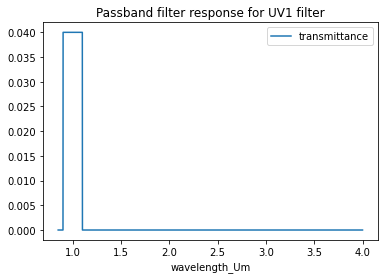

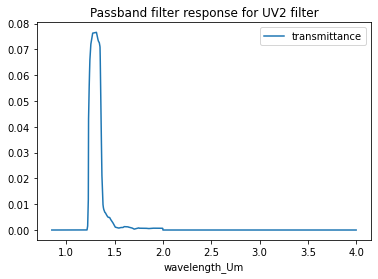

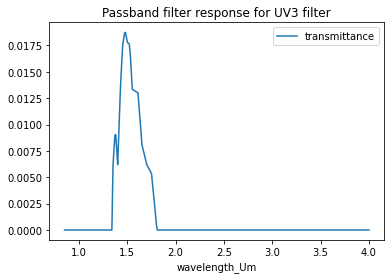

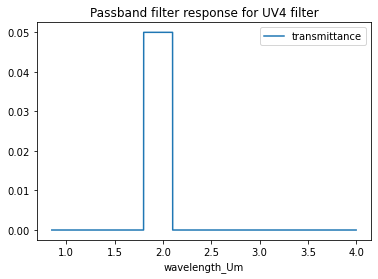

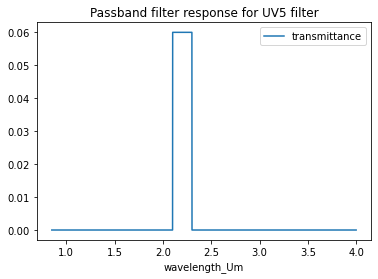

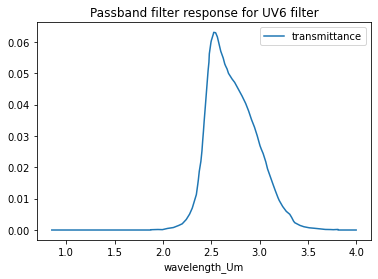

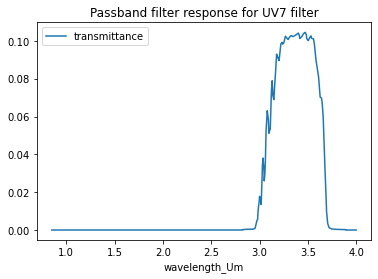

In [2]:
### Read the csv file ###
def read_file(src_path):
    '''
    Input
    ------------------------------------
    The path of the source file which 
    needs to be read
    
    Using pandas it reads the csv file
    
    returns
    ------------------------------------
    A csv file
    '''
    return pd.read_csv(src_path)

### Convert the units ###
def conversion(data_frame):
    '''
    Input
    ------------------------------------
    Data frame with wavelength units 
    in Angstrong
    
    Converts the wavelengths from 
    Angstrong to micrometers
    
    returns 
    ------------------------------------
    Data frame with wavekength 
    in micrometers
    '''
    data_frame['wavelength_A'] = data_frame['wavelength_A']/1000
    data_frame.rename(columns = {'wavelength_A':'wavelength_Um'},
                      inplace=True)
    return data_frame
    
### Plot the graph ###
def plot_filters(data_frame,i):
    '''
    Input
    -------------------------------------
    Data frame in micrometers
    
    Output
    -------------------------------------
    A visual plot of the passband filter
    '''
    data_frame.plot(x='wavelength_Um',
                    y='transmittance',
                    title = f'Passband filter response for UV{i} filter')    

def all_plot(data_frame):
    fig, ax = plt.subplots()
    ax.plot(data_frame['wavelength_Um'], 
            data_frame['transmittance'])
    
### Since there were 7 filters, I looped over 7 times ###
### This can vary depending on your application       ###
for i in range(1,8):
    # Define a path
    path = 'C:\\Users\\user\\Desktop\\castor\\filters_public\\UV'+str(i)+'.csv'
    # Read file
    df = read_file(path)
    # Convert the units
    df_micro = conversion(df)
    # Plot the passband filters
    plot_filters(df_micro, i)
    # Save as per the format mentioned in CASTOR ETC
    np.savetxt(r'C:\Users\user\Desktop\castor\filters_2\uv'+str(i), df_micro, delimiter='  ')



#### Define your parameters

Now you need to define the custom parameters of the mission. For this example I have used the filters mentioned above.


In [3]:
### Make a dictionary of all the parameters that you wish to change  ###
### example --> dictionary = {'parameters': [val1, val2, val3],      ###
###                           'parameters': {val1, val2,val3}}       ###

'''
Note this the important part because once you enter these values 
the code will compute all the values. And if you try to mofidy    
these parameters later on it might not reflect in the entire code 
which might result in unexpected results.
'''

passbands=["uv1","uv2","uv3","uv4","uv5","uv6","uv7"]

### Define the parameters of each passband filter ####
custom_params = {
    "passbands": ["uv1","uv2","uv3","uv4","uv5","uv6","uv7"],
    "passband_limits": {"uv1": [0.90, 0.110] * u.um,
                        "uv2": [0.120, 0.140] * u.um,
                        "uv3": [0.140, 0.180] * u.um,
                        "uv4": [0.180, 0.210] * u.um,
                        "uv5": [0.210, 0.230] * u.um,
                        "uv6": [0.230, 0.280] * u.um,
                        "uv7": [0.280, 0.350] * u.um},
    
    "passband_response_filepaths": {
        band: f"C:\\Users\\user\\Desktop\\castor\\filters\\{band}" for band in passbands
    },
    
    "passband_response_fileunits": {"uv1": u.um,"uv2": u.um,"uv3": u.um,"uv4": u.um,"uv5": u.um,"uv6": u.um,"uv7": u.um},
    "passband_pivots": None,  # automatically calculate
    "phot_zpts": None,  # automatically calculate
    "phot_zpts_kwargs": {
        "ab_mags": {"uv1": [26, -19.0],  #[positive upper bound, negative lower bound]
                    "uv2": [26, -19.0],
                    "uv3": [26, -19.0],
                    "uv4": [26, -19.0],
                    "uv5": [26, -19.0],  
                    "uv6": [26, -19.0],
                    "uv7": [26, -19.0]},
        "method": "bisection",  # I recommend using bisection since it is more stable
        "tol": 2e-4,
        "max_iter": 100,
    },
    "fwhm": 0.5 * u.arcsec,
    "px_scale": 16.632 * u.arcsec,
    "ifov_dimen": [0.35, 0.30] * u.deg,  # not currently used for any calculations
    "mp": 500,  # not currently used for any calculations
    "mirror_diameter": 8 * u.cm,
    "dark_current": 1.5e-4,  # Marana camera dark noise # maybe you want to change this?
    "read_noise": 1.6, # Read noise of Marana(Andor) detector # maybe you want to change this?
    "redleak_thresholds": {"uv1": 2020 * u.AA,
                           "uv2": 2020 * u.AA,
                           "uv3": 2020 * u.AA,
                           "uv4": 2020 * u.AA,
                           "uv5": 2020 * u.AA,
                           "uv6": 2020 * u.AA,
                           "uv7": 2020 * u.AA},
    "extinction_coeffs": {"uv1": 5.2,
                          "uv2": 5.2,
                          "uv3": 5.2,
                          "uv4": 5.2,
                          "uv5": 5.2,
                          "uv6": 5.2,
                          "uv7": 5.2},
    "show_warnings": True,
}


#### Telescope Design

In [4]:
 
# Set up telescope instance. Parameters must be passed in during initialization!

MyTelescope = Telescope(**custom_params)

# Check to make sure automatical calculations are working
zpts = MyTelescope.phot_zpts
passband_pivots = MyTelescope.passband_pivots

### Data Visualization ###

### Zero Points Data Frame ###
zpts_df = pd.DataFrame([zpts.keys(),zpts.values()]).T
zpts_df.rename(columns = {0:'Passband Filter', 
                          1:'Zero Point'}, 
               inplace=True)
zpts_df

,Passband Filter,Zero Point
0,uv1,15.863
1,uv2,15.874
2,uv3,14.838
3,uv4,15.818
4,uv5,15.443
5,uv6,16.368
6,uv7,16.689


Text(0.5, 1.0, 'Zero points of different filters')

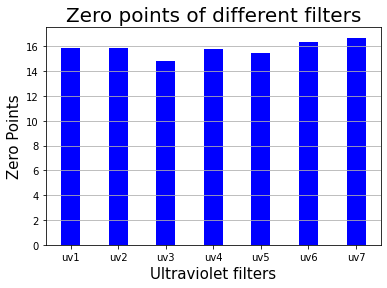

In [5]:
### Zero Points Bar Graph ###
fig, ax = plt.subplots() 
ax.bar(zpts.keys(),zpts.values(), width=0.4, color='blue')
ax.grid(axis='y')
ax.set_xlabel('Ultraviolet filters',fontsize = 15)
ax.set_ylabel('Zero Points',fontsize = 15)
ax.set_title('Zero points of different filters', fontsize =20)


In [6]:
### Passband Pivots Data Frame ###
pivots_df = pd.DataFrame([passband_pivots.keys(), 
                          passband_pivots.values()]).T
pivots_df.rename(columns={0:'Passband Filters',
                          1:'Passband Pivots'},
                 inplace = True)
pivots_df

,Passband Filters,Passband Pivots
0,uv1,0.09966636755799294 um
1,uv2,0.13187808029734832 um
2,uv3,0.1535061846400841 um
3,uv4,0.19464074918174687 um
4,uv5,0.21975771761942028 um
5,uv6,0.2713330344902507 um
6,uv7,0.336095955813104 um


#### Defining the Background

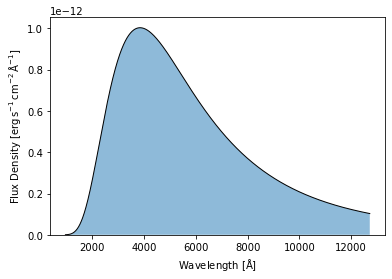

In [7]:
### Use default sky background values ###
MyBackground = Background()

### Looping over filters ### 
### for band in passbands:
###    print(band)


### Generate a point source ###
MySource = PointSource()
### Blackbody radiation ###
MySource.generate_bb(8000 * u.K, redshift=0.06)
### 
MySource.norm_to_AB_mag(20, # Limiting magnitude value can also be run in a loop
                        passband="uv1", # You can run this in a loop of all 7 filters
                        TelescopeObj=MyTelescope)
MySource.show_spectrum()


#### Photometry

Now once you have defined your telescope, source and the background you can perform photometery. 

For this you either have to define SNR and obtain the results for time or provide input as time and obtaine corresponding results in terms of SNR.

INFO: Point source encircled energy = 74.30%
INFO: Note that, while these weights are useful in visualizing the point source, changing the source weights for a point source will not affect the final photometry calculation (again, only for point sources).
      Instead, set the `encircled_energy` parameter in the `calc_snr_or_t()` method to affect the signal-to-noise or integration time calculations.
      You can silence this message by setting `quiet=True`.


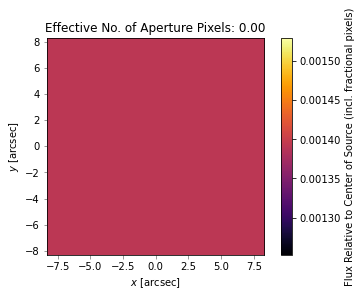

,Passband Filter,Exposure Time (Seconds)
0,uv1,1662.049972
1,uv2,48.533189
2,uv3,30.727623
3,uv4,2.046882
4,uv5,1.382999
5,uv6,0.213526
6,uv7,0.078422


In [8]:
MyPhot = Photometry(MyTelescope, MySource, MyBackground)
MyPhot.use_optimal_aperture()  # dimensions determined by the FWHM of the telescope's PSF
MyPhot.show_source_weights(quiet=False) # quiet=True if you want hide the messages

### input snr 
time_ = MyPhot.calc_snr_or_t(snr=5)  # time required to reach a signal-to-noise ratio of 5

### input time
#MyPhot.calc_snr_or_t(t=120)

### Data Visualisation ###
time_df = pd.DataFrame([time_.keys(),time_.values()]).T
time_df.rename(columns = {0:'Passband Filter', 
                          1:'Exposure Time (Seconds)'},
              inplace = True)
time_df

The above table tells how much time the telescope needs detect a star with magnitude of 20 and having a snr of  5

You can notice that only uv1 has high exposure time this is because we entered the band as uv1 (refer the background cell). You can change this passband or even loop over all the passband values.

So this is this basics, however you can also loop around these magnitude and passband values. 

Plotting a graph of limiting magnitude against the exposure time would be a good idea for your mission analysis.